# Classification

In [133]:
import pandas as pd
from sklearn.metrics import accuracy_score

import evaluation as eval
import classification_utils as class_utils

df = pd.read_csv('../data/transformed.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,tmID_0,tmID_1,tmID_2,...,coachID_2,coachID_3,coachID_4,coachID_5,confID,year,firstRound,semis,finals,playoff
0,-3.934517,-1.352800,-0.724820,0.880406,0.003875,-0.823730,-0.167498,0,0,0,...,0,0,0,1,0,2,0,0,0,1
1,1.333858,-2.051460,1.921364,-0.270140,0.976174,2.630491,0.634819,0,0,0,...,0,0,1,0,0,2,1,1,0,1
2,-1.981541,1.558531,1.146336,0.187226,-1.209318,-0.157367,0.410495,0,0,0,...,0,0,1,1,0,2,0,0,0,0
3,5.401423,0.709745,1.254823,1.283298,-0.428218,-0.680932,-1.010997,0,0,1,...,0,1,0,0,1,2,1,1,1,1
4,-3.375582,1.179698,0.450744,0.993467,-0.908878,0.081303,0.582192,0,0,1,...,0,1,0,1,0,2,0,0,0,0


## Algorithms and Param Grids

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [135]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=8, max_iter=10000, random_state=320)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [136]:
from sklearn.svm import SVC

svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient ('scale' and 'auto' options)
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type: linear, radial basis function (RBF), polynomial
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if 'kernel' is 'poly')
    'coef0': [0.0, 0.1, 0.5]  # Independent term in the polynomial kernel equation (if 'kernel' is 'poly')
}

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

### Ensembles

In [138]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=42)
bagging_param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

In [139]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['deviance', 'exponential'],
}

In [141]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
}

### Voting

In [142]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('svm', svm),
], voting='soft')

## Classification

In [143]:
classifier = gradient_boosting
param_grid = random_forest_param_grid
target = 'playoff'

---------------------- YEAR 3 ----------------------
AUC: 56.25%
Accuracy: 50.0%
Precision: 50.0%
Recall: 50.0%
F1: 50.0%
---------------------- YEAR 4 ----------------------
AUC: 51.43%
Accuracy: 41.67%
Precision: 50.0%
Recall: 57.14%
F1: 53.33%
---------------------- YEAR 5 ----------------------


AUC: 52.5%
Accuracy: 38.46%
Precision: 50.0%
Recall: 50.0%
F1: 50.0%
---------------------- YEAR 6 ----------------------
AUC: 72.5%
Accuracy: 84.62%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%
---------------------- YEAR 7 ----------------------
AUC: 82.5%
Accuracy: 84.62%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%
---------------------- YEAR 8 ----------------------
AUC: 62.5%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 9 ----------------------
AUC: 85.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 10 ----------------------


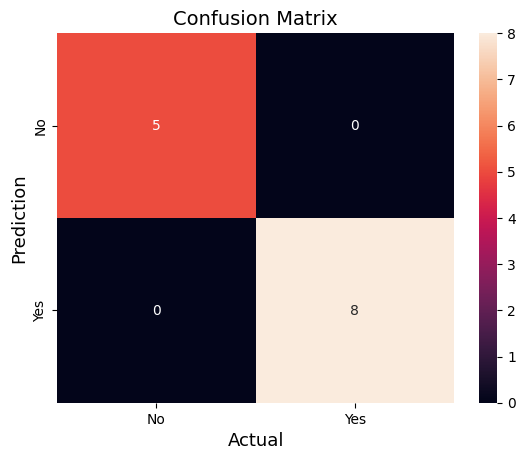

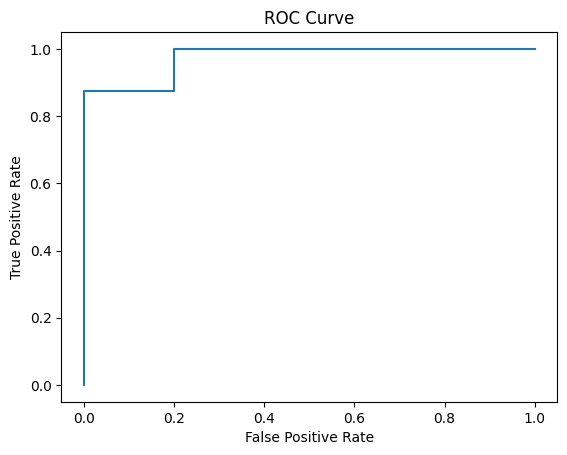

AUC: 97.5%
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%


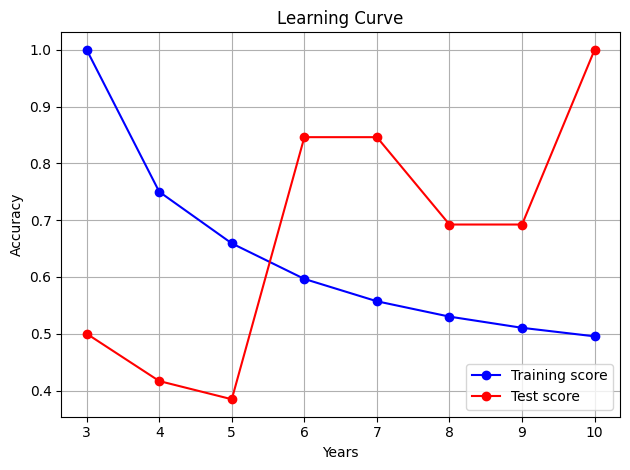

In [144]:
years = []
train_scores = []
test_scores = []

for year in df['year'].unique():
    if year < 3:
        continue

    print(f"---------------------- YEAR {year} ----------------------")

    class_utils.train_model_simple(classifier, df, year, target)
    #class_utils.train_model_hyper_tunning(classifier, df, year, target, param_grid)

    y_test, y_test_prob, conf_test, y_train, y_train_prob, conf_train = class_utils.test_model(classifier, df, year,
                                                                                               target)

    y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
    y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)

    eval.model_score(y_test, y_test_pred, y_test_prob, year == 10)

    years.append(year)
    test_scores.append(accuracy_score(y_test, y_test_pred))
    train_scores.append(accuracy_score(y_train, y_train_pred))

eval.plot_learning_curve(years, train_scores, test_scores)